In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day11\rfm_data_customer.csv", index_col =0)
df.head()

,revenue,most_recent_visit,number_of_orders,recency_days
customer_id,,,,
22086,777,2006-05-14,9,232
2290,1555,2006-09-08,16,115
26377,336,2006-11-19,5,43
24650,1189,2006-10-29,12,64
12883,1229,2006-12-09,12,23


In [3]:
df.drop('most_recent_visit', inplace=True, axis=1)
df

,revenue,number_of_orders,recency_days
customer_id,,,
22086,777,9,232
2290,1555,16,115
26377,336,5,43
24650,1189,12,64
12883,1229,12,23
...,...,...,...
3249,998,10,31
6686,771,8,187
16418,1016,9,154


In [4]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)

In [5]:
#using Kmeans
Ks = [2,3,4,5,6]
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i, random_state=24)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Best no. of clusters: 3
Best Score: 0.37102897041720206


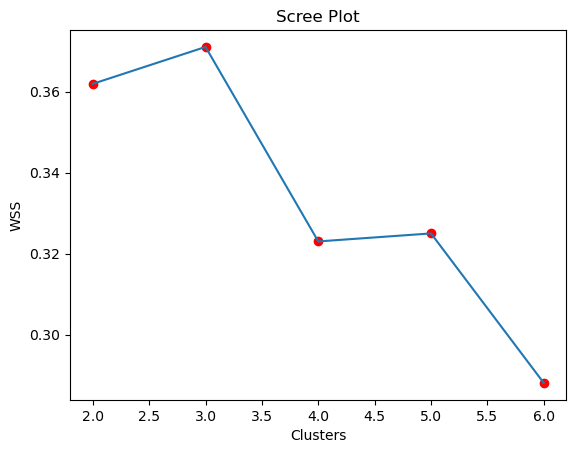

In [6]:
plt.scatter(Ks, scores, c='red')
plt.plot(Ks, scores)
plt.title("Scree Plot")
plt.xlabel("Clusters")
plt.ylabel("WSS")
plt.show()

In [7]:
clust = KMeans(n_clusters=Ks[i_max], random_state=24)
clust.fit(df_scaled)

KMeans(n_clusters=3, random_state=24)

In [8]:
clust_data = df.copy()
clust_data['Clust'] = clust.labels_
print(clust_data.groupby('Clust').mean())

           revenue  number_of_orders  recency_days
Clust                                             
0      1281.119459         12.909267    133.255123
1       749.292247          8.227773    136.139784
2       692.414498          7.351090    416.697185


In [9]:
print(clust_data['Clust'].value_counts())

Clust
1    18457
0    14934
2     6608
Name: count, dtype: int64


In [10]:
print(clust_data.groupby('Clust').corr())

                         revenue  number_of_orders  recency_days
Clust                                                           
0     revenue           1.000000          0.608137     -0.010057
      number_of_orders  0.608137          1.000000     -0.057150
      recency_days     -0.010057         -0.057150      1.000000
1     revenue           1.000000          0.633329     -0.011593
      number_of_orders  0.633329          1.000000     -0.047350
      recency_days     -0.011593         -0.047350      1.000000
2     revenue           1.000000          0.799252     -0.100518
      number_of_orders  0.799252          1.000000     -0.158976
      recency_days     -0.100518         -0.158976      1.000000


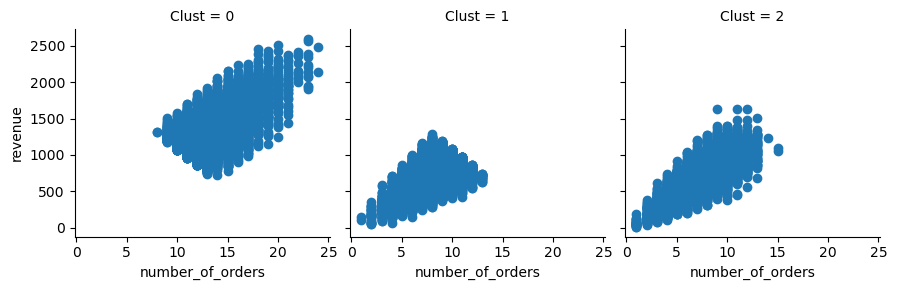

In [11]:
g = sns.FacetGrid(clust_data, col="Clust")
g.map(plt.scatter, "number_of_orders", "revenue")
plt.show()

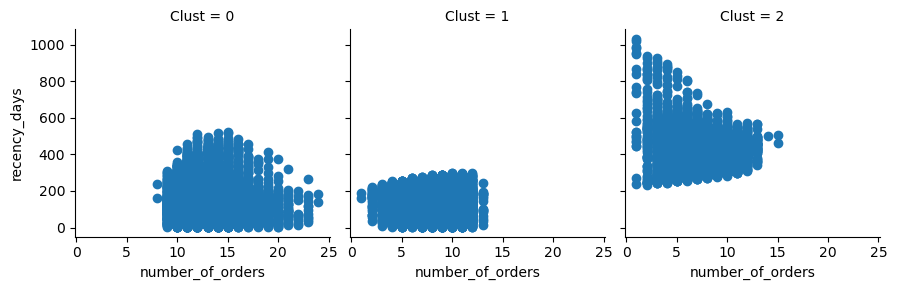

In [12]:
g = sns.FacetGrid(clust_data, col="Clust")
g.map(plt.scatter, "number_of_orders", "recency_days")
plt.show()

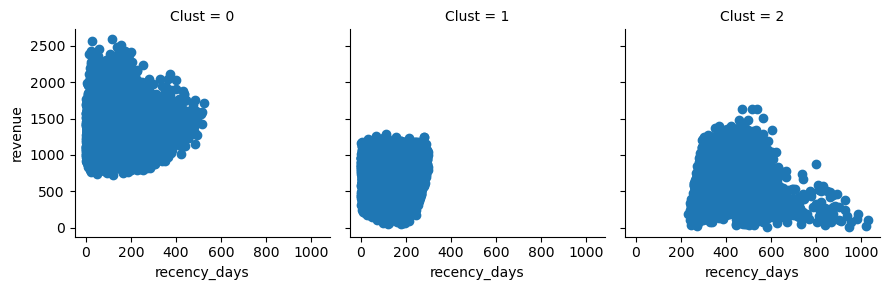

In [13]:
g = sns.FacetGrid(clust_data, col="Clust")
g.map(plt.scatter, "recency_days", "revenue")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


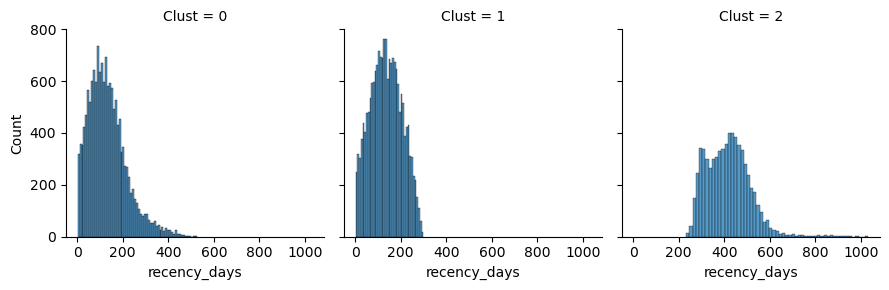

In [14]:
g = sns.FacetGrid(clust_data, col="Clust")
g.map(sns.histplot, "recency_days")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


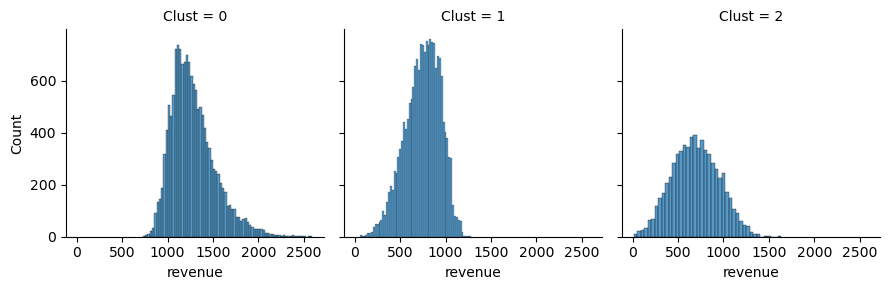

In [15]:
g = sns.FacetGrid(clust_data, col="Clust")
g.map(sns.histplot, "revenue")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


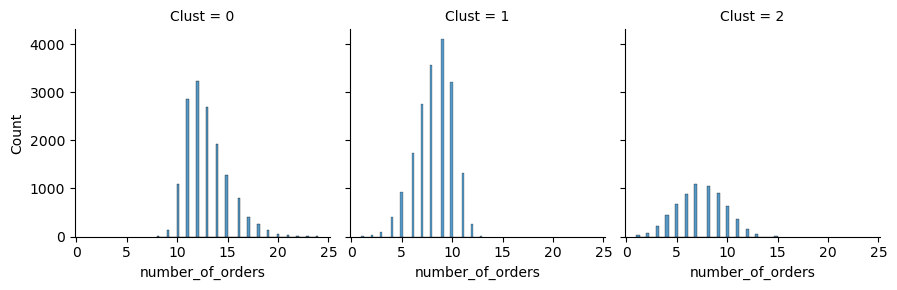

In [16]:
g = sns.FacetGrid(clust_data, col="Clust")
g.map(sns.histplot, "number_of_orders")
plt.show()